[理论知识](https://zhuanlan.zhihu.com/p/77151308)
[代码实现](https://www.cnblogs.com/liu247/p/10993154.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [63]:
plt.rcParams['font.family'] = 'SimHei'

In [2]:
# 使用loadmat函数加载.mat文件
raw_data = loadmat('data1.mat');raw_data2 = loadmat('data2.mat');raw_data3 = loadmat('data3.mat')
# 将前两列特征和最后一列目标值读入data中
data1 = raw_data['X'];data2 = raw_data2['X'];data3 = raw_data3['X']

In [3]:
def fun(data, dim):
    # 将数据进行标准化
    # 求平均值
    mean_val = np.mean(data,axis=0)
    meaned_data = data - mean_val
    # 计算协方差矩阵
    cov_mat = np.cov(meaned_data,rowvar=False)
    # 计算特征值和特征向量
    eig_vals,eig_vects = np.linalg.eig(np.mat(cov_mat))
    # 对特征值从大到小排序
    sorted_index = np.argsort(-eig_vals) 
    # 取最大的dim个特征索引
    topn_index = sorted_index[:dim]
    # 最大的n个特征值对应的特征向量
    topn_vects = eig_vects[:,topn_index] 
    # 将数据映射降维
    # 投影到低维空间
    pca_data = meaned_data * topn_vects
    # 重构数据
    recon_data = (pca_data * topn_vects.T)+mean_val
    # print('还原后的数据\n',recon_data)
    return pca_data

In [4]:
pca_data1 = fun(data1,1)
pca_data2 = fun(data2,1)

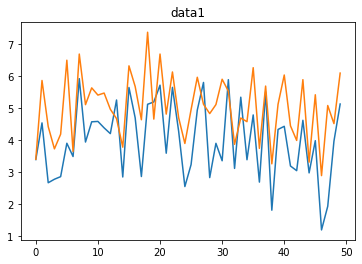

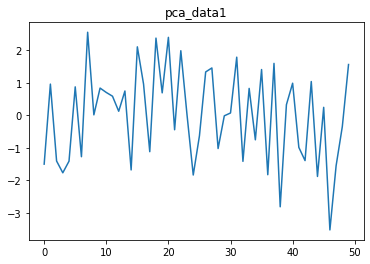

In [5]:
plt.plot(data1)
plt.title('data1')
plt.show()
plt.plot(pca_data1)
plt.title('pca_data1')
plt.show()


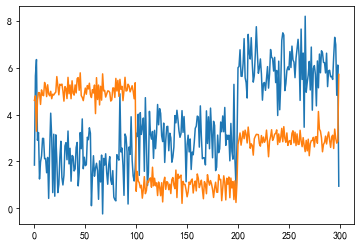

c:\Users\ZSY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


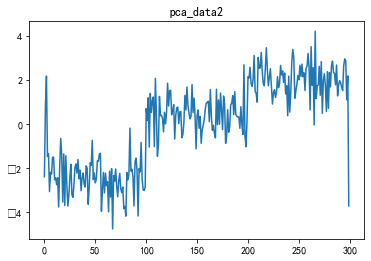

In [57]:
plt.plot(data2)
plt.show()
plt.title('pca_data2')
plt.plot(pca_data2)
plt.show()

# data3

In [7]:
# 使用sklean实现
from sklearn.decomposition import PCA
data3.shape

(5000, 1024)

In [8]:
pca = PCA()
pca.fit(data3)

PCA()

c:\Users\ZSY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32500 (\N{CJK UNIFIED IDEOGRAPH-7EF4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ZSY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ZSY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ZSY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ZSY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36129 (\N{CJK UNIFIED IDEOGRAPH-8D21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


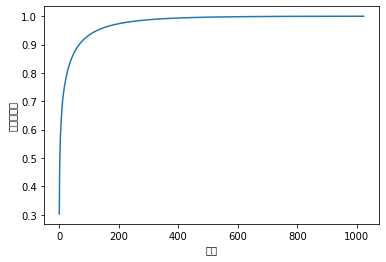

In [9]:
sum = 0
list=[]
for i in pca.explained_variance_ratio_:
    sum = sum + i
    list.append(sum)
plt.plot(list)
plt.rcParams['font.family'] = 'SimHei'
plt.xlabel('维度')
plt.ylabel('累计贡献率')
plt.show()

In [10]:
# 初始化PCA模型
pca = PCA(n_components=300)
print('模型：',pca) 
# 训练模型
pca.fit(data3)
# 获得降维后的数据
feature2  = pca.fit_transform(data3)
print('特征值的比例:',pca.explained_variance_ratio_)
print('降维后的占比:',sum(pca.explained_variance_ratio_))
plt.plot(feature2)
plt.show()

模型： PCA(n_components=300)
特征值的比例: [3.02747852e-01 1.37051035e-01 6.62869472e-02 4.10817530e-02
 3.50032786e-02 2.19278631e-02 2.06932056e-02 1.82294405e-02
 1.58865918e-02 1.55133734e-02 1.27370638e-02 1.26155920e-02
 1.10333140e-02 8.94720537e-03 8.23908693e-03 7.65908143e-03
 7.55911216e-03 6.77059060e-03 6.69004842e-03 6.14609927e-03
 5.50268966e-03 5.45217094e-03 5.35920298e-03 5.08182848e-03
 4.89449487e-03 4.74027913e-03 4.62834822e-03 4.36934653e-03
 4.20854426e-03 4.19831870e-03 3.92887206e-03 3.87479905e-03
 3.69644798e-03 3.58336860e-03 3.45728315e-03 3.25888187e-03
 3.21810103e-03 3.01114037e-03 2.98299288e-03 2.88302501e-03
 2.75519219e-03 2.70374159e-03 2.65031724e-03 2.56320869e-03
 2.48740305e-03 2.42467728e-03 2.36100903e-03 2.27195805e-03
 2.17699881e-03 2.13782672e-03 2.11143255e-03 2.01697886e-03
 1.95274385e-03 1.91988430e-03 1.89349550e-03 1.85092877e-03
 1.84116744e-03 1.72652856e-03 1.69731214e-03 1.68189707e-03
 1.65413395e-03 1.62217730e-03 1.52948456e-03 1.501

TypeError: 'numpy.float64' object is not callable

In [17]:
# 使用sklean实现
from sklearn.decomposition import PCA

In [29]:
# 初始化PCA模型
pca = PCA(n_components=1, random_state=42, svd_solver='full')
print('模型：', pca)
# 训练模型
pca.fit(data1)


模型： PCA(n_components=1, random_state=42, svd_solver='full')


PCA(n_components=1, random_state=42, svd_solver='full')

c:\Users\ZSY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


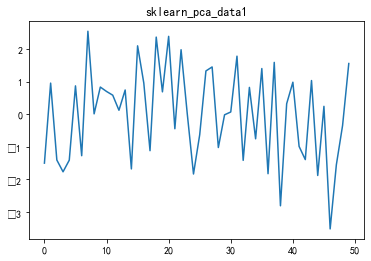

In [67]:
# 获得降维后的数据
feature1  = pca.fit_transform(data1)
# print('特征值的比例:',pca.explained_variance_ratio_)
# print('降维后的占比:',sum(pca.explained_variance_ratio_))
# print('降维后的数据：\n',feature1[:5])
feature1.shape
for i in range(0,len(feature1)):
    feature1[i]=-feature1[i]
plt.plot(feature1)
plt.title('sklearn_pca_data1')
plt.show()

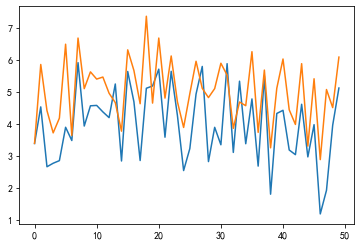

c:\Users\ZSY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


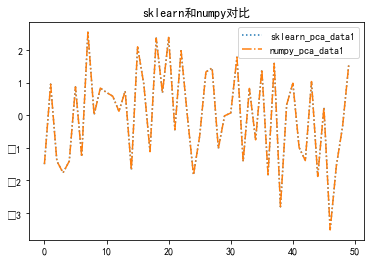

In [78]:
plt.plot(data1)
plt.show()
plt.title('sklearn和numpy对比')
plt.plot(feature1,':')
plt.plot(pca_data1,'-.')
plt.legend(['sklearn_pca_data1', 'numpy_pca_data1'])
plt.show()